In [ ]:
!conda install opencv

In [1]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import os
os.listdir('natural_images')
import numpy as np

In [3]:

Predicted_Label = np.array(['airplane','car','cat','dog','flower','fruit','motorbike','person'])
n = os.listdir('natural_images/')

In [4]:
features = []
labels = []
import cv2
from tqdm import tqdm
j=0
for i in n:
    s = 'natural_images/'
    loc = s + i
    for img in tqdm(os.listdir(loc)):
        im = cv2.imread(os.path.join(loc,img))
        im = cv2.resize(im,(70,70))
        features.append(im)
        labels.append(j)
    j=j+1


100%|███████████████████████████████████████████████████████████████████████████████| 986/986 [00:04<00:00, 231.86it/s]


In [5]:
import numpy as np
X = np.array(features)
Y = np.array(labels)

In [6]:
print(X.shape)
print(Y.shape)

(6899, 70, 70, 3)
(6899,)


In [7]:
X = X/255

In [8]:

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.utils import np_utils#flatten for fully connected layer cob=nversion

Using TensorFlow backend.


In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [10]:
#one hot encoding
ytrain_h = np_utils.to_categorical(ytrain)
ytest_h = np_utils.to_categorical(ytest)

In [11]:
xtrain.shape[1:]

(70, 70, 3)

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3) , padding='same' , input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(256,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 35, 35, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history1 = model.fit(xtrain, ytrain_h, 
          epochs=15,
          validation_data=(xtest, ytest_h))

Epoch 1/15
162/162 [==============================] - 8s 24ms/step - loss: 1.6471 - accuracy: 0.3851 - val_loss: 0.6289 - val_accuracy: 0.7861
Epoch 2/15
162/162 [==============================] - 3s 16ms/step - loss: 0.6059 - accuracy: 0.7735 - val_loss: 0.4472 - val_accuracy: 0.8388
Epoch 3/15
162/162 [==============================] - 3s 16ms/step - loss: 0.4015 - accuracy: 0.8418 - val_loss: 0.4003 - val_accuracy: 0.8388
Epoch 4/15
162/162 [==============================] - 3s 16ms/step - loss: 0.3077 - accuracy: 0.8820 - val_loss: 0.4038 - val_accuracy: 0.8388
Epoch 5/15
162/162 [==============================] - 3s 16ms/step - loss: 0.2858 - accuracy: 0.8859 - val_loss: 0.2959 - val_accuracy: 0.8841
Epoch 6/15
162/162 [==============================] - 3s 17ms/step - loss: 0.2394 - accuracy: 0.9017 - val_loss: 0.2764 - val_accuracy: 0.8922
Epoch 7/15
162/162 [==============================] - 3s 16ms/step - loss: 0.1878 - accuracy: 0.9267 - val_loss: 0.3372 - val_accuracy: 0.8771

In [16]:
model.evaluate(xtrain,ytrain_h)

162/162 [==============================] - 1s 6ms/step - loss: 0.0583 - accuracy: 0.9780


[0.05829460173845291, 0.9779667854309082]

In [17]:
model.evaluate(xtest,ytest_h)

54/54 [==============================] - 0s 6ms/step - loss: 0.2835 - accuracy: 0.9043


[0.2834585905075073, 0.904347836971283]

# After 15 epochs we have got 90 percent accuracy on simple convolution neural network

# data augmentation
from tqdm import tqdm
j = os.listdir('natural_images/')
s = 'natural_images/'
for j in plants:
    loc = s+j
    for i in tqdm(os.listdir(loc)):
        f = cv2.imread(os.path.join(loc,i))
        image = f.reshape((1,)+ f.shape)
        r=0
        for batch in datagen.flow(image,batch_size=1,save_to_dir=j, save_prefix='aug',save_format='jpeg'):
            r += 1
            if r > 10:
                break

In [2]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [3]:
Predicted_Label = np.array(['airplane','car','cat','dog','flower','fruit','motorbike','person'])

In [4]:
n = os.listdir('natural_images_aug/')

In [5]:
features_A = []
labels_A = []
import cv2
from tqdm import tqdm
j=0
for i in n:
    s = 'natural_images_aug/'
    loc = s + i
    for img in tqdm(os.listdir(loc)):
        im = cv2.imread(os.path.join(loc,img))
        im = cv2.resize(im,(70,70))
        features_A.append(im)
        labels_A.append(j)
    j=j+1

100%|█████████████████████████████████████████████████████████████████████████████| 6636/6636 [00:08<00:00, 804.02it/s]


In [6]:
import numpy as np
X = np.array(features_A)
Y = np.array(labels_A)

In [7]:

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.utils import np_utils#flatten for fully connected layer cob=nversion

In [8]:
X = X/255

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [10]:
#one hot encoding
ytrain_h = np_utils.to_categorical(ytrain)
ytest_h = np_utils.to_categorical(ytest)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3) , padding='same' , input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(256,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 35, 35, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0

In [13]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [14]:
history = model.fit(xtrain, ytrain_h, 
          epochs=15,validation_data=(xtest, ytest_h))

Epoch 1/15
1144/1144 [==============================] - 45s 28ms/step - loss: 1.1938 - accuracy: 0.5439 - val_loss: 0.8205 - val_accuracy: 0.7159
Epoch 2/15
1144/1144 [==============================] - 19s 16ms/step - loss: 0.4938 - accuracy: 0.8141 - val_loss: 0.3470 - val_accuracy: 0.8645
Epoch 3/15
1144/1144 [==============================] - 19s 16ms/step - loss: 0.3573 - accuracy: 0.8661 - val_loss: 0.2966 - val_accuracy: 0.8858
Epoch 4/15
1144/1144 [==============================] - 19s 16ms/step - loss: 0.3008 - accuracy: 0.8859 - val_loss: 0.2627 - val_accuracy: 0.8957
Epoch 5/15
1144/1144 [==============================] - 19s 17ms/step - loss: 0.2713 - accuracy: 0.8983 - val_loss: 0.2501 - val_accuracy: 0.8997
Epoch 6/15
1144/1144 [==============================] - 19s 17ms/step - loss: 0.2459 - accuracy: 0.9097 - val_loss: 0.2285 - val_accuracy: 0.9129
Epoch 7/15
1144/1144 [==============================] - 19s 17ms/step - loss: 0.2257 - accuracy: 0.9130 - val_loss: 0.2000 -

In [15]:
model.evaluate(xtrain,ytrain_h)

1144/1144 [==============================] - 7s 6ms/step - loss: 0.0802 - accuracy: 0.9701


[0.08019882440567017, 0.9701451659202576]

In [16]:
model.evaluate(xtest,ytest_h)

382/382 [==============================] - 2s 6ms/step - loss: 0.1771 - accuracy: 0.9329


[0.17705729603767395, 0.9329123497009277]

In [17]:
hist = history
import matplotlib.pyplot as plt

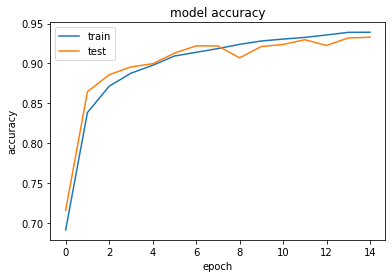

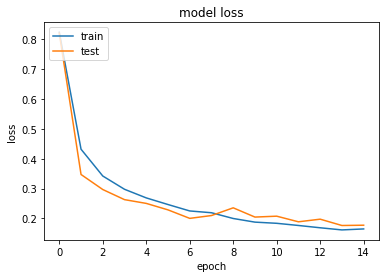

In [18]:
# Summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model accuracy.png')
plt.show()
# Summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model loss.png')
plt.show()

# Applying Svm

In [19]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense').output)

feat_train = model_feat.predict(xtrain)
print(feat_train.shape)

feat_test = model_feat.predict(xtest)
print(feat_test.shape)


(36577, 512)
(12193, 512)


In [20]:
from sklearn.svm import SVC

svm = SVC(kernel='poly',C=10,degree=4,coef0 = 1.0,gamma='auto')

svm.fit(feat_train,np.argmax(ytrain_h,axis=1))

print('fitting done !!!')

fitting done !!!


In [21]:
svm.score(feat_train,np.argmax(ytrain_h,axis=1))

0.9981682478059983

In [22]:
svm.score(feat_test,np.argmax(ytest_h,axis=1))

0.9427540392028213

# Result : - We were able to increase the effciency of model by 4 percent by applying Svm over the last 2nd layer of Neural Network

In [23]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

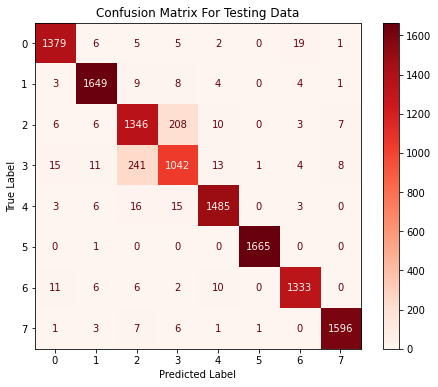

In [24]:
matrix = plot_confusion_matrix(svm,feat_test,np.argmax(ytest_h,axis=1),cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix For Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().set_size_inches(8,6)
plt.show()

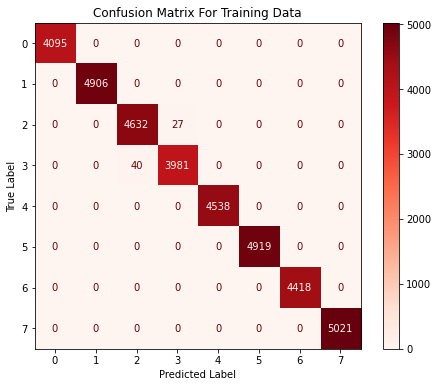

In [25]:
matrix = plot_confusion_matrix(svm,feat_train,np.argmax(ytrain_h,axis=1),cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix For Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().set_size_inches(8,6)
plt.show()

# Saving Svm Model

In [96]:
import pickle

In [98]:
filename = 'svm_model.sav'
pickle.dump(svm,open(filename,'wb'))

In [115]:
model.save('neural_svm_v5.h5')

# Modeling Testing

In [99]:
def ImagePreprocessing(Image_Array):
    
    Image_Array = cv2.resize(Image_Array,(70,70))
    Image_Array = Image_Array.reshape(-1,70,70,3)
    Image_Array = Image_Array / 255
    return Image_Array

In [103]:
def ExtractFeatures_CNN(I):
    model_feat = Model(inputs=model.input,outputs = model.get_layer('dense').output)
    return model_feat.predict(I)

In [104]:
I = cv2.imread('p1.jpg')
I = ImagePreprocessing(I)

In [105]:
f = ExtractFeatures_CNN(I)

In [110]:
print("PREDICTED")
print(Predicted_Label[svm.predict(f)])

PREDICTED
['airplane']


Actual


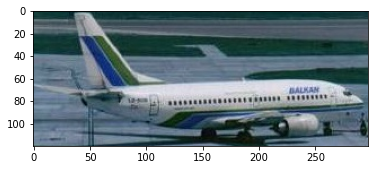

In [114]:
print("Actual")
plt.imshow(cv2.imread('p1.jpg'))
plt.show()

In [116]:
I = cv2.imread('p2.jpg')
I = ImagePreprocessing(I)

In [117]:
f = ExtractFeatures_CNN(I)

In [118]:
print("PREDICTED")
print(Predicted_Label[svm.predict(f)])

PREDICTED
['dog']


Actual


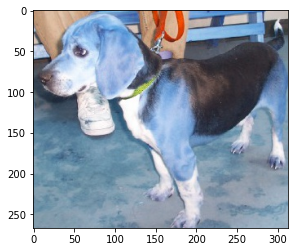

In [120]:
print("Actual")
plt.imshow(cv2.imread('p2.jpg'))
plt.show()